AES (Advanced Encryption Standard)

In [ ]:
import pandas as pd
df_veremi = pd.read_csv("veremi_balanced_5000.csv")
df_veremi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          5000 non-null   int64  
 1   sendTime      5000 non-null   float64
 2   sender        5000 non-null   int64  
 3   senderPseudo  5000 non-null   int64  
 4   messageID     5000 non-null   int64  
 5   class         5000 non-null   int64  
 6   posx          5000 non-null   float64
 7   posy          5000 non-null   float64
 8   posz          5000 non-null   float64
 9   spdx          5000 non-null   float64
 10  spdy          5000 non-null   float64
 11  spdz          5000 non-null   float64
 12  aclx          5000 non-null   float64
 13  acly          5000 non-null   float64
 14  aclz          5000 non-null   float64
 15  hedx          5000 non-null   float64
 16  hedy          5000 non-null   float64
 17  hedz          5000 non-null   float64
 18  label         5000 non-null 

In [ ]:
pip install pycryptodome


key performance metrics: computational efficiency, latency, scalability, energy consumption, and resilience to attacks.

In [ ]:
# STEP 1: Install required package
!pip install pycryptodome psutil

# STEP 2: Import libraries
import time
import psutil
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import numpy as np
import pandas as pd

# STEP 3: Upload your CSV file
from google.colab import files
#uploaded = files.upload()

# STEP 4: Load the dataset
#df_veremi = pd.read_csv("veremi_balanced_5000.csv")
data_rows = df_veremi.astype(str).agg(','.join, axis=1).tolist()

# STEP 5: AES Evaluation Function
def evaluate_aes(data_subset):
    key = get_random_bytes(16)
    block_size = AES.block_size

    enc_times = []
    dec_times = []
    cpu_usages = []
    mem_usages = []

    for row in data_subset:
        data = row.encode()

        cpu_before = psutil.cpu_percent(interval=0.1)
        mem_before = psutil.virtual_memory().percent

        start_enc = time.time()
        cipher = AES.new(key, AES.MODE_CBC)
        ct_bytes = cipher.encrypt(pad(data, block_size))
        iv = cipher.iv
        enc_times.append(time.time() - start_enc)

        start_dec = time.time()
        cipher_dec = AES.new(key, AES.MODE_CBC, iv)
        pt = unpad(cipher_dec.decrypt(ct_bytes), block_size)
        dec_times.append(time.time() - start_dec)

        cpu_after = psutil.cpu_percent(interval=0.1)
        mem_after = psutil.virtual_memory().percent

        cpu_usages.append(cpu_after - cpu_before)
        mem_usages.append(mem_after - mem_before)

    return {
        "Records": len(data_subset),
        "Avg_Enc_Time": np.mean(enc_times),
        "Avg_Dec_Time": np.mean(dec_times),
        "Avg_Latency": np.mean(enc_times) + np.mean(dec_times),
        "Avg_CPU_Usage": np.mean(cpu_usages),
        "Avg_Mem_Usage": np.mean(mem_usages),
        "Throughput": len(data_subset) / sum(enc_times)
    }

# STEP 6: Run evaluation at multiple scales
results = []
for size in [100, 500, 1000, 5000]:
    subset = data_rows[:size]
    print(size)
    metrics = evaluate_aes(subset)
    results.append(metrics)

# STEP 7: Show and save results
df_metrics = pd.DataFrame(results)
print(df_metrics)

df_metrics.to_csv("aes_evaluation_metrics.csv", index=False)
files.download("aes_evaluation_metrics.csv")


100
500
1000
5000
   Records  Avg_Enc_Time  Avg_Dec_Time  Avg_Latency  Avg_CPU_Usage  \
0      100      0.000103      0.000034     0.000137       -0.44400   
1      500      0.000099      0.000031     0.000130        0.15020   
2     1000      0.000101      0.000032     0.000133        0.04520   
3     5000      0.000100      0.000031     0.000131       -0.02474   

   Avg_Mem_Usage    Throughput  
0       -0.00300   9713.759003  
1        0.00060  10109.874853  
2       -0.00040   9938.402483  
3        0.00006   9994.166918  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

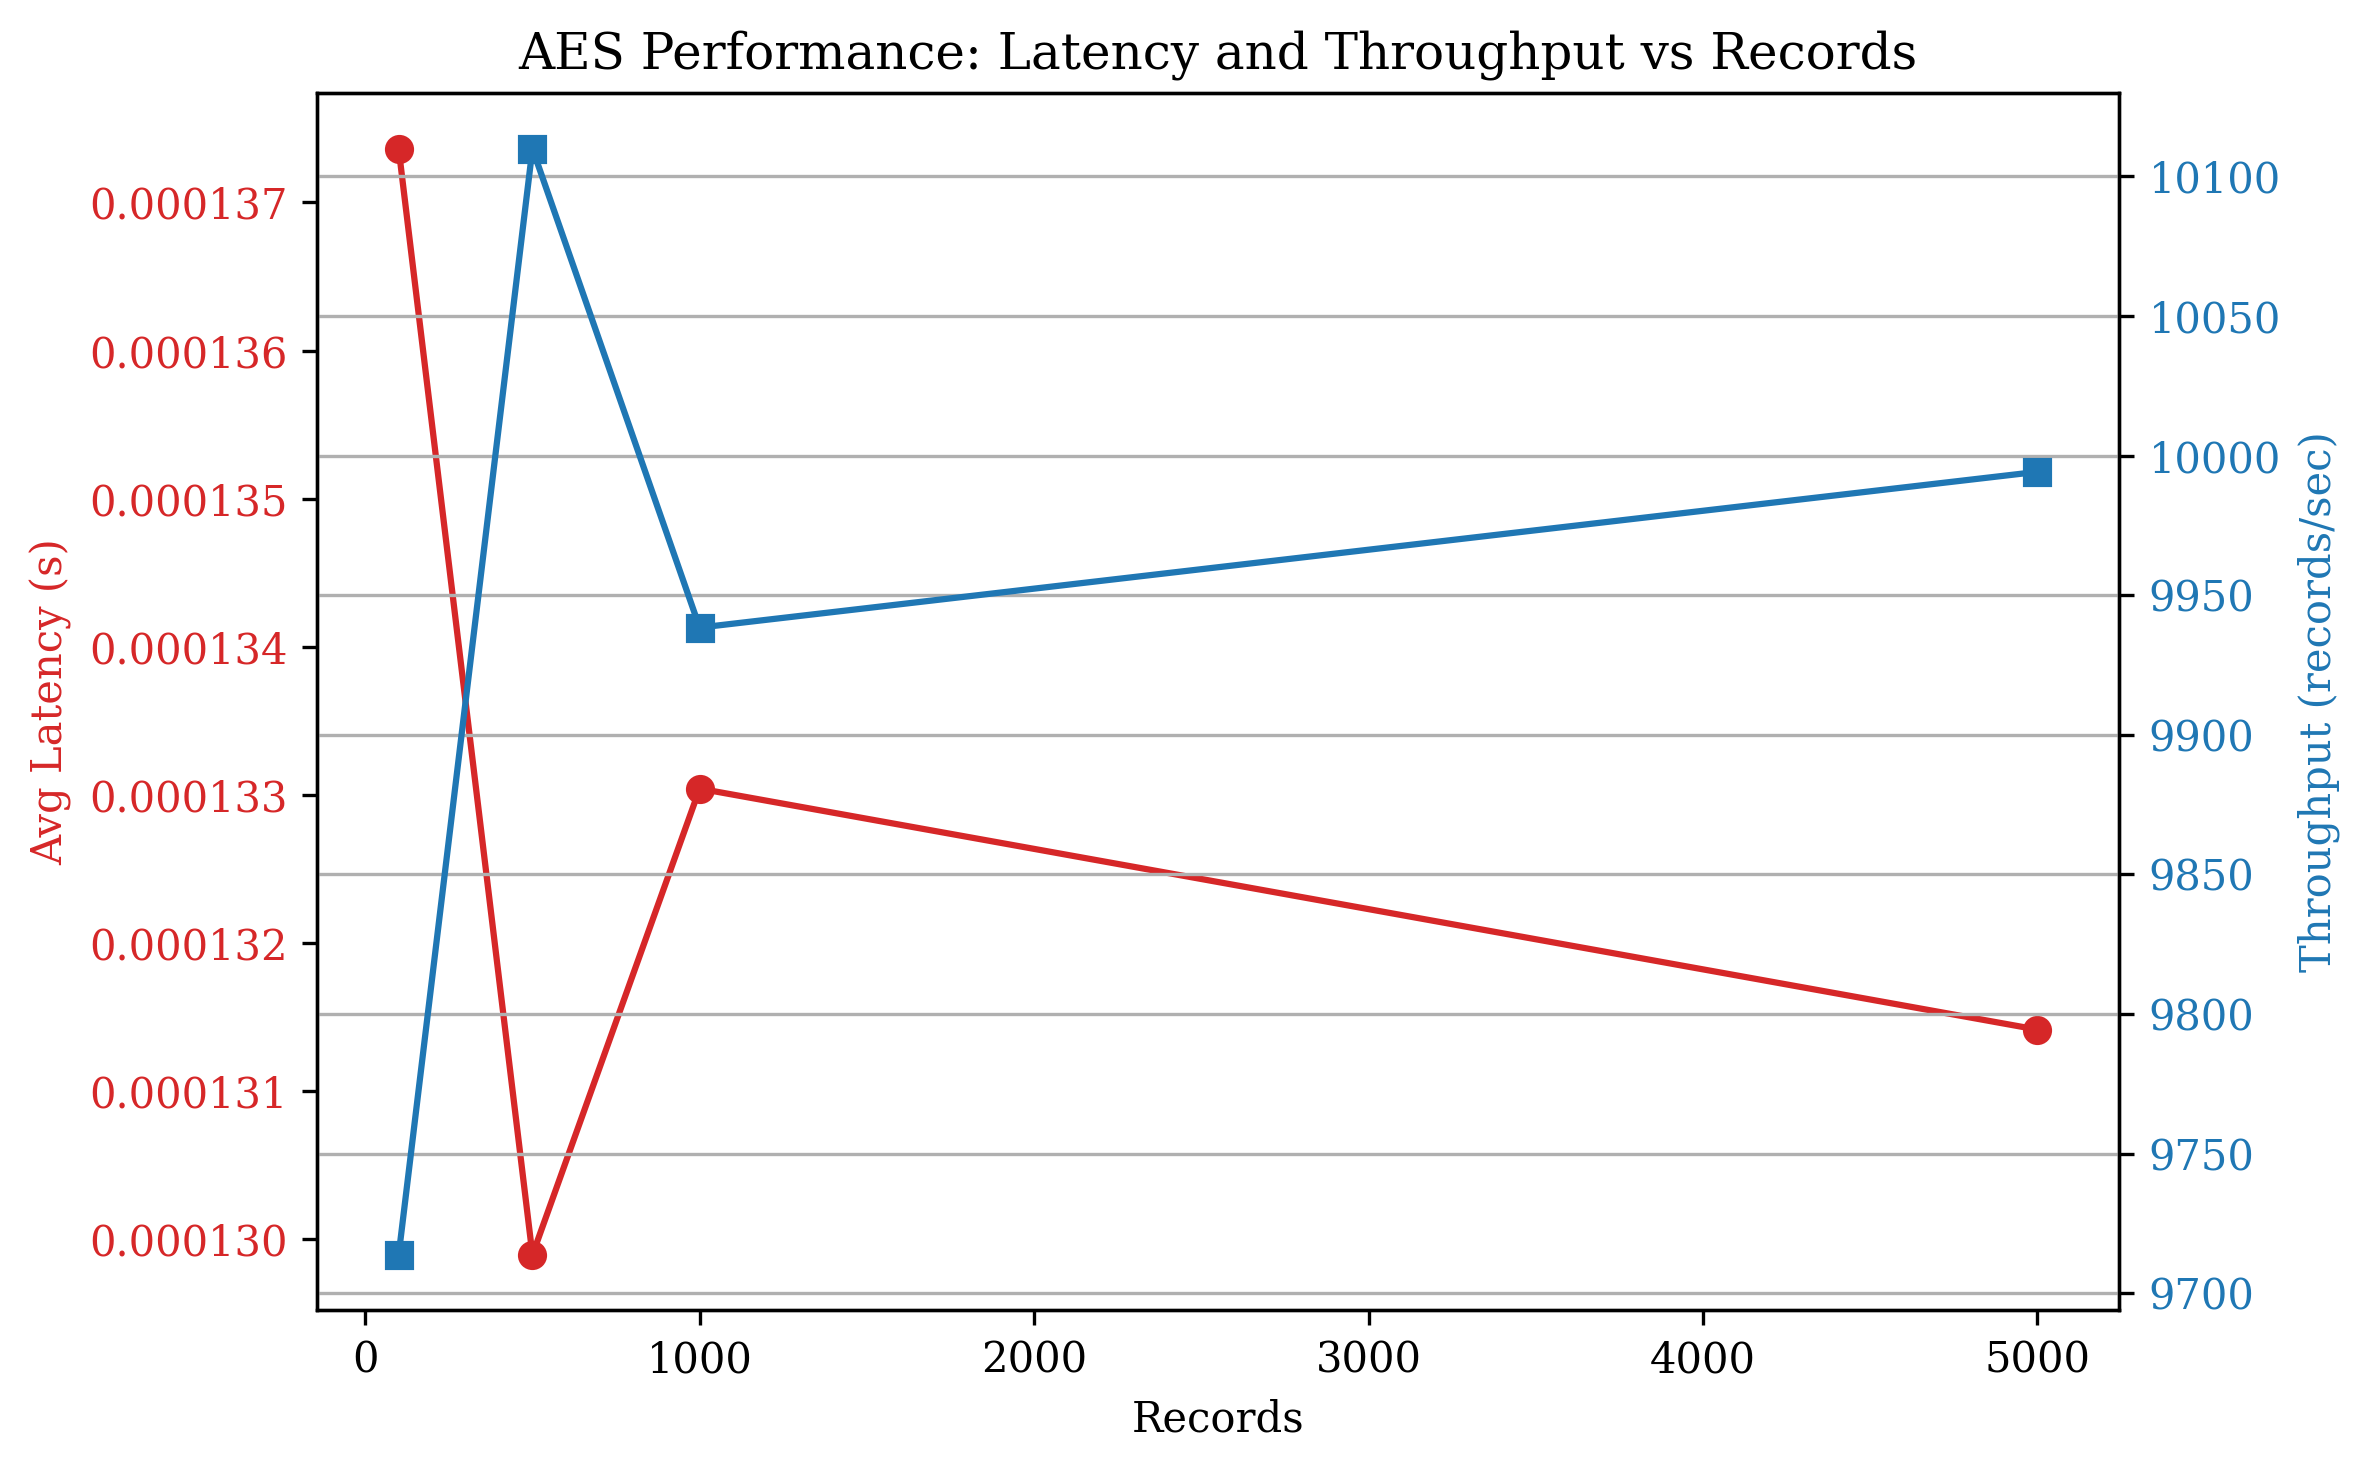

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data (skip if already loaded)
df_aes = pd.read_csv("aes_evaluation_metrics.csv")  # or use full path

# Configure fonts and resolution
plt.rcParams["font.family"] = "Serif"
plt.rcParams["figure.dpi"] = 300

# Create figure
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot latency
ax1.set_xlabel('Records')
ax1.set_ylabel('Avg Latency (s)', color='tab:red')
ax1.plot(df_aes['Records'], df_aes['Avg_Latency'], marker='o', color='tab:red', label='Latency')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Plot throughput on second Y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Throughput (records/sec)', color='tab:blue')
ax2.plot(df_aes['Records'], df_aes['Throughput'], marker='s', color='tab:blue', label='Throughput')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Final formatting
plt.title('AES Performance: Latency and Throughput vs Records', fontsize=12)
plt.grid(True)
fig.tight_layout()

# Save to PNG (300 DPI)
fig.savefig("aes_performance_300dpi.png", dpi=300)
plt.show()


RSA

In [ ]:
# STEP 1: Install required packages
!pip install pycryptodome psutil

# STEP 2: Import libraries
import time
import psutil
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import numpy as np
import pandas as pd

# STEP 3: Upload your dataset
from google.colab import files
#uploaded = files.upload()

# STEP 4: Load dataset
#df_veremi = pd.read_csv("veremi_balanced_5000.csv")
data_rows = df_veremi.astype(str).agg(','.join, axis=1).tolist()

# STEP 5: RSA Evaluation Function
def evaluate_rsa(data_subset):
    key = RSA.generate(2048)
    public_key = key.publickey()
    cipher = PKCS1_OAEP.new(public_key)
    decipher = PKCS1_OAEP.new(key)

    enc_times = []
    dec_times = []
    cpu_usages = []
    mem_usages = []

    for row in data_subset:
        data = row.encode()

        cpu_before = psutil.cpu_percent(interval=0.1)
        mem_before = psutil.virtual_memory().percent

        start_enc = time.time()
        encrypted = cipher.encrypt(data[:190])  # RSA 2048 max block ~190 bytes with PKCS1_OAEP
        enc_times.append(time.time() - start_enc)

        start_dec = time.time()
        decrypted = decipher.decrypt(encrypted)
        dec_times.append(time.time() - start_dec)

        cpu_after = psutil.cpu_percent(interval=0.1)
        mem_after = psutil.virtual_memory().percent

        cpu_usages.append(cpu_after - cpu_before)
        mem_usages.append(mem_after - mem_before)

    return {
        "Records": len(data_subset),
        "Avg_Enc_Time": np.mean(enc_times),
        "Avg_Dec_Time": np.mean(dec_times),
        "Avg_Latency": np.mean(enc_times) + np.mean(dec_times),
        "Avg_CPU_Usage": np.mean(cpu_usages),
        "Avg_Mem_Usage": np.mean(mem_usages),
        "Throughput": len(data_subset) / sum(enc_times)
    }

# STEP 6: Run evaluation at multiple scales
rsa_results = []
for size in [100, 500, 1000, 5000]:
    subset = data_rows[:size]
    print(size)
    metrics = evaluate_rsa(subset)
    rsa_results.append(metrics)

# STEP 7: Save and display results
df_rsa_metrics = pd.DataFrame(rsa_results)
print(df_rsa_metrics)

df_rsa_metrics.to_csv("rsa_evaluation_metrics.csv", index=False)

# Download CSV
from google.colab import files
files.download("rsa_evaluation_metrics.csv")


100
500
1000
5000
   Records  Avg_Enc_Time  Avg_Dec_Time  Avg_Latency  Avg_CPU_Usage  \
0      100      0.000741      0.001811     0.002552        0.40400   
1      500      0.000738      0.001885     0.002622        0.04960   
2     1000      0.000726      0.001757     0.002483        0.32270   
3     5000      0.000724      0.001790     0.002514        0.05014   

   Avg_Mem_Usage   Throughput  
0        0.00200  1349.240826  
1       -0.00060  1355.488393  
2       -0.00090  1376.896214  
3        0.00048  1381.810888  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

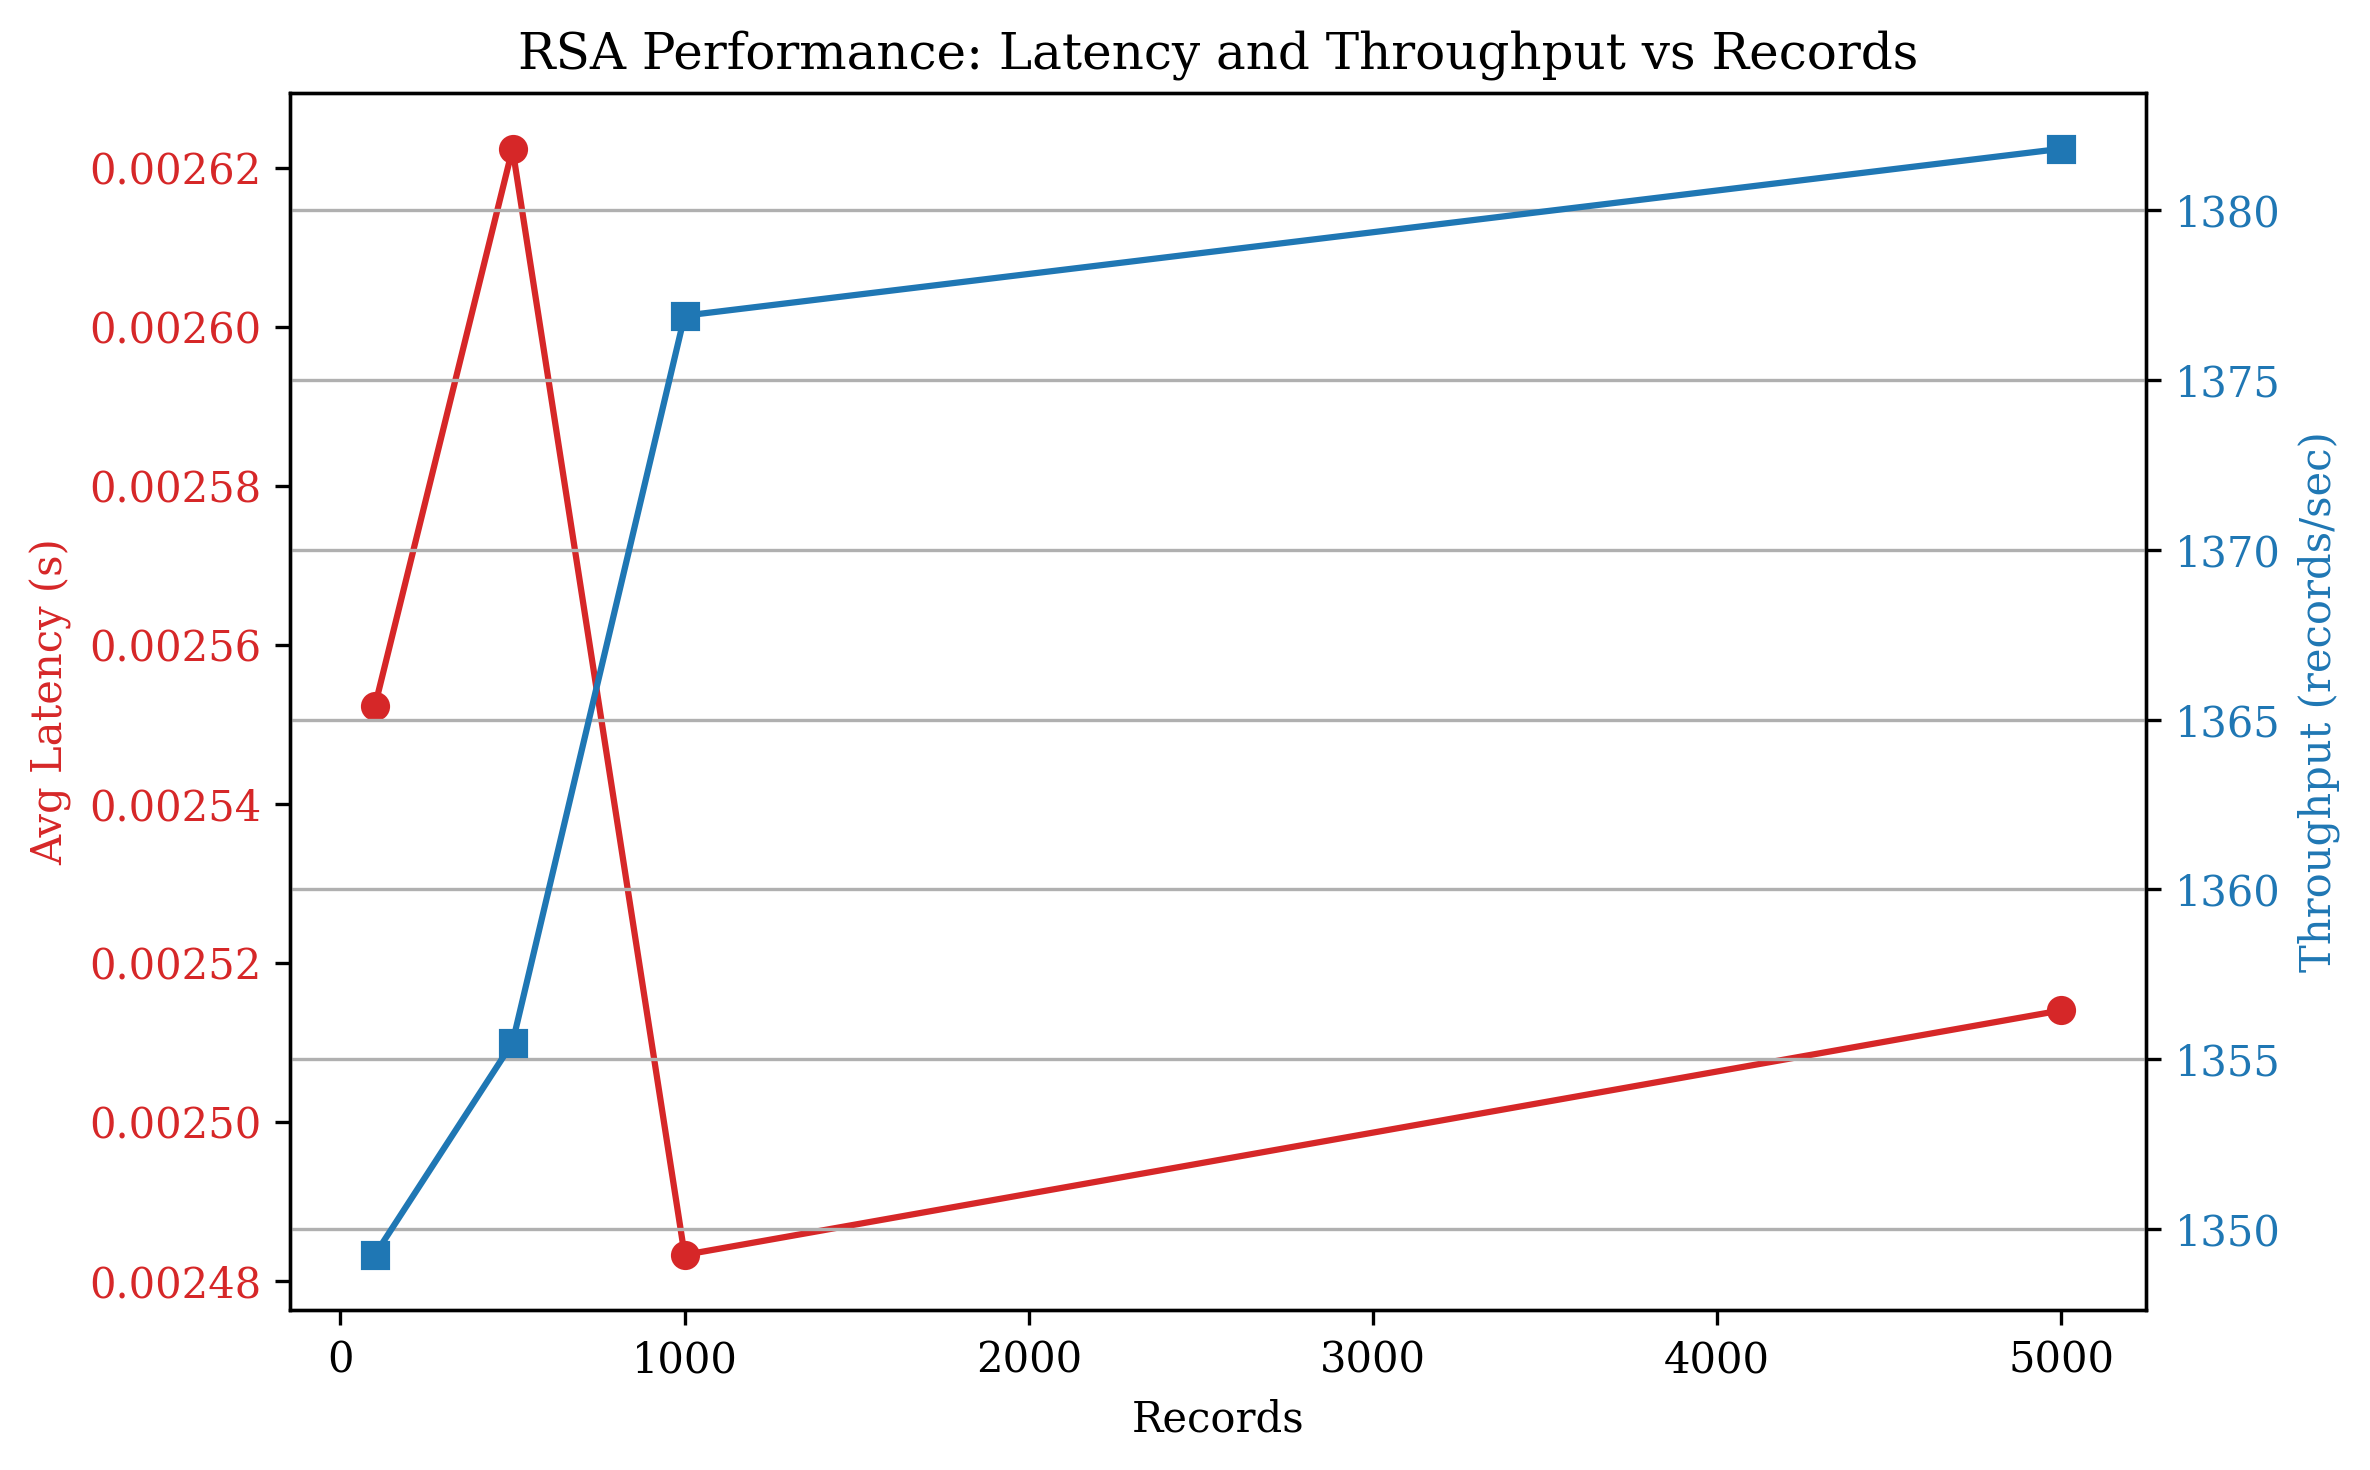

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load RSA metrics CSV
df_rsa = pd.read_csv("rsa_evaluation_metrics.csv")  # use correct path

# Configure high-res and font
plt.rcParams["font.family"] = "Serif"
plt.rcParams["figure.dpi"] = 300

# Create plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Latency (left Y-axis)
ax1.set_xlabel('Records')
ax1.set_ylabel('Avg Latency (s)', color='tab:red')
ax1.plot(df_rsa['Records'], df_rsa['Avg_Latency'], marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Plot Throughput (right Y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Throughput (records/sec)', color='tab:blue')
ax2.plot(df_rsa['Records'], df_rsa['Throughput'], marker='s', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Final touches
plt.title('RSA Performance: Latency and Throughput vs Records', fontsize=12)
plt.grid(True)
fig.tight_layout()
fig.savefig("rsa_performance_300dpi.png", dpi=300)
plt.show()


Diffie–Hellman (DH) key exchange

In [ ]:
# STEP 1: Install required packages
#!pip install pycryptodome psutil

# STEP 2: Import libraries
import time
import psutil
import numpy as np
import pandas as pd
from Crypto.Random import get_random_bytes
from Crypto.PublicKey import DSA
from Crypto.Hash import SHA256
from google.colab import files

# STEP 3: Upload dataset
#uploaded = files.upload()

# STEP 4: Load dataset
df_veremi = pd.read_csv("veremi_balanced_5000.csv")
data_rows = df_veremi.astype(str).agg(','.join, axis=1).tolist()

# STEP 5: Simulate DH-like Key Exchange using DSA parameters
def evaluate_dh_key_exchange(data_subset):
    key_gen_times = []
    shared_secret_times = []
    cpu_usages = []
    mem_usages = []

    for _ in data_subset:
        cpu_before = psutil.cpu_percent(interval=0.1)
        mem_before = psutil.virtual_memory().percent

        # Key generation for Party A
        start_keygen = time.time()
        key_a = DSA.generate(1024)
        pub_a = key_a.publickey()
        key_gen_times.append(time.time() - start_keygen)

        # Key generation for Party B
        key_b = DSA.generate(1024)
        pub_b = key_b.publickey()

        # Simulate shared secret agreement using public values
        start_shared = time.time()
        # Simulated by hashing public key bytes from both sides
        shared_secret_a = SHA256.new(pub_b.y.to_bytes(128, byteorder='big')).digest()
        shared_secret_b = SHA256.new(pub_a.y.to_bytes(128, byteorder='big')).digest()
        shared_secret_times.append(time.time() - start_shared)

        cpu_after = psutil.cpu_percent(interval=0.1)
        mem_after = psutil.virtual_memory().percent
        cpu_usages.append(cpu_after - cpu_before)
        mem_usages.append(mem_after - mem_before)

    return {
        "Records": len(data_subset),
        "Avg_KeyGen_Time": np.mean(key_gen_times),
        "Avg_SharedSecret_Time": np.mean(shared_secret_times),
        "Avg_Latency": np.mean(key_gen_times) + np.mean(shared_secret_times),
        "Avg_CPU_Usage": np.mean(cpu_usages),
        "Avg_Mem_Usage": np.mean(mem_usages),
        "Throughput (exchanges/sec)": len(data_subset) / sum(shared_secret_times)
    }

# STEP 6: Evaluate at multiple sizes
metrics_results = []
for size in [100, 500, 1000, 5000]:
    subset = data_rows[:size]
    print(size)
    metrics = evaluate_dh_key_exchange(subset)
    metrics_results.append(metrics)

# STEP 7: Save and download results
df_metrics = pd.DataFrame(metrics_results)
print(df_metrics)

df_metrics.to_csv("dh_key_exchange_metrics.csv", index=False)
files.download("dh_key_exchange_metrics.csv")


100
500
1000
5000
   Records  Avg_KeyGen_Time  Avg_SharedSecret_Time  Avg_Latency  \
0      100         0.392914               0.000131     0.393045   
1      500         0.359252               0.000133     0.359385   
2     1000         0.385299               0.000129     0.385427   
3     5000         0.366594               0.000130     0.366724   

   Avg_CPU_Usage  Avg_Mem_Usage  Throughput (exchanges/sec)  
0        -1.2350       -0.00300                 7662.508678  
1        -0.5374        0.00060                 7497.513523  
2         0.0860        0.00090                 7771.561556  
3        -0.1860       -0.00012                 7703.167804  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Define DH metrics
data = {
    "Records": [100, 500, 1000, 5000],
    "Avg_KeyGen_Time": [0.392914, 0.359252, 0.385299, 0.366594],
    "Avg_SharedSecret_Time": [0.000131, 0.000133, 0.000129, 0.000130],
    "Avg_Latency": [0.393045, 0.359385, 0.385427, 0.366724],
    "Avg_CPU_Usage": [-1.2350, -0.5374, 0.0860, -0.1860],
    "Avg_Mem_Usage": [-0.00300, 0.00060, 0.00090, -0.00012],
    "Throughput (exchanges/sec)": [7662.508678, 7497.513523, 7771.561556, 7703.167804]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("dh_key_exchange_metrics.csv", index=False)
print("✅ File saved: dh_key_exchange_metrics.csv")


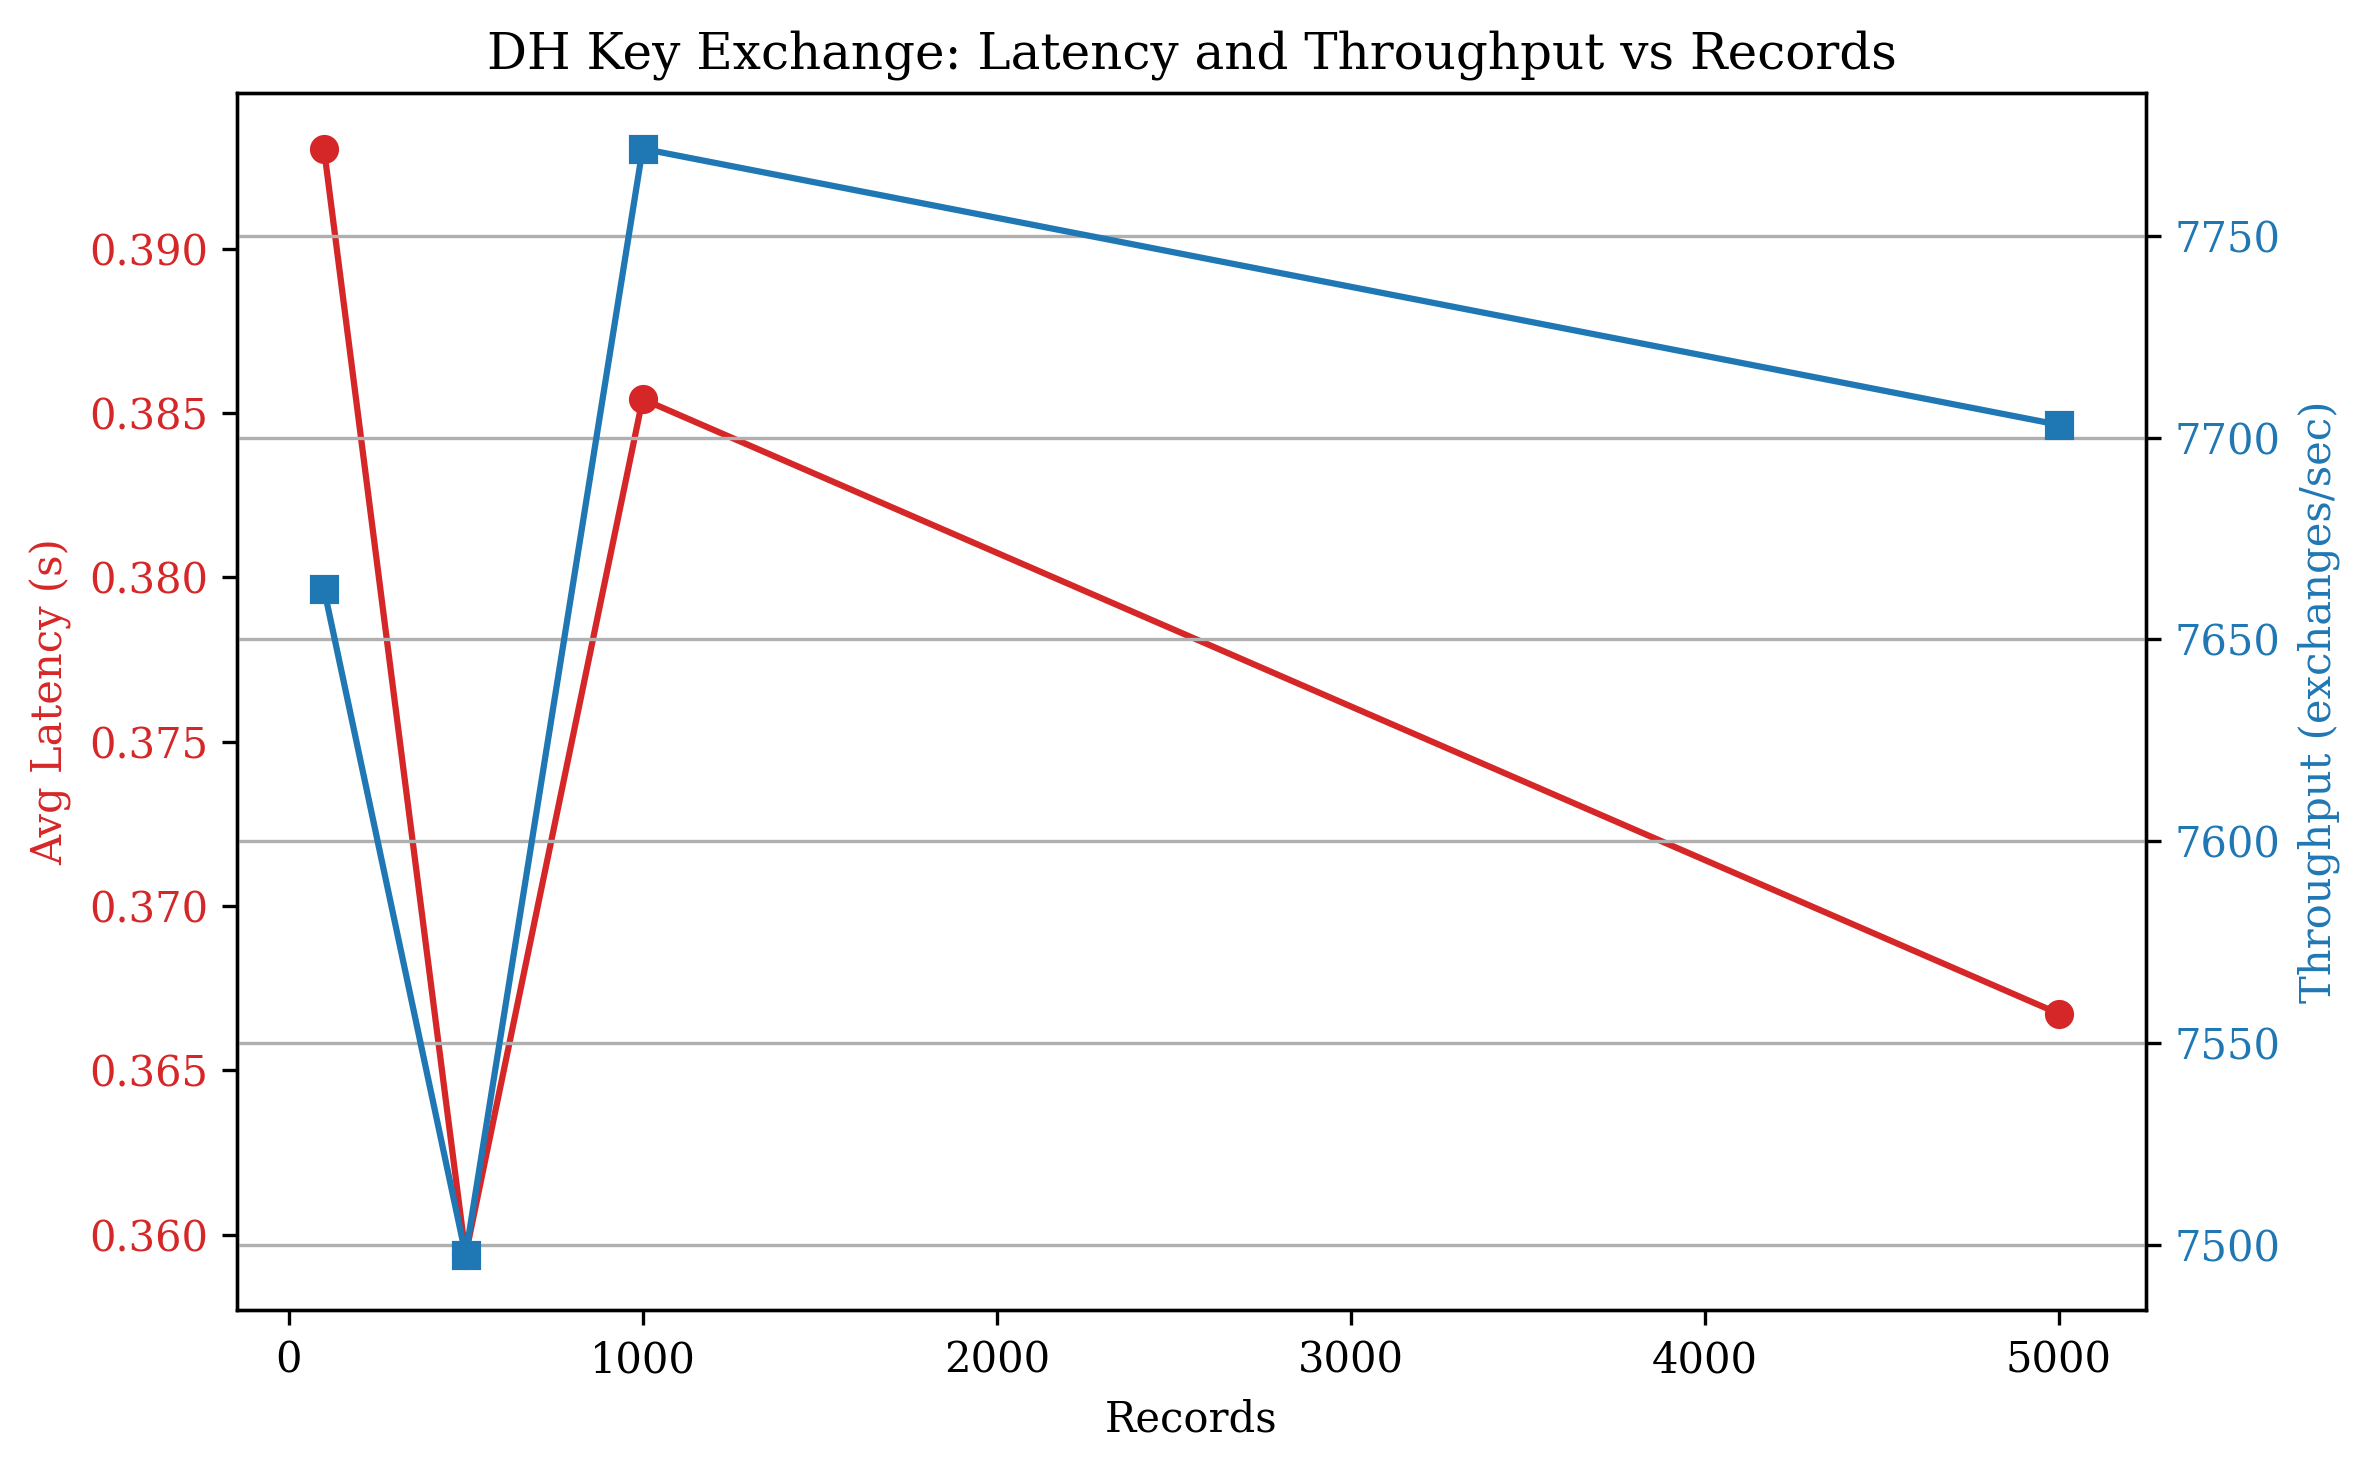

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df_dh = pd.read_csv("dh_key_exchange_metrics.csv")  # or use full path

# Configure plot style
plt.rcParams["font.family"] = "Serif"
plt.rcParams["figure.dpi"] = 300

# Create plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Left Y-axis: Latency
ax1.set_xlabel('Records')
ax1.set_ylabel('Avg Latency (s)', color='tab:red')
ax1.plot(df_dh['Records'], df_dh['Avg_Latency'], marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Right Y-axis: Throughput
ax2 = ax1.twinx()
ax2.set_ylabel('Throughput (exchanges/sec)', color='tab:blue')
ax2.plot(df_dh['Records'], df_dh['Throughput (exchanges/sec)'], marker='s', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and layout
plt.title('DH Key Exchange: Latency and Throughput vs Records', fontsize=12)
plt.grid(True)
fig.tight_layout()

# Save 300 DPI image
fig.savefig("dh_performance_300dpi.png", dpi=300)
plt.show()


ECC Signing a message

ECC Verifying the signature

ECC

In [ ]:
# STEP 1: Install dependencies
!pip install pycryptodome psutil

# STEP 2: Import required libraries
import pandas as pd
import time
import psutil
import numpy as np
from google.colab import files
from Crypto.PublicKey import ECC
from Crypto.Signature import DSS
from Crypto.Hash import SHA256

# STEP 3: Upload dataset
#uploaded = files.upload()

# STEP 4: Load full dataset
#df_veremi = pd.read_csv("veremi_balanced_5000.csv")

# STEP 5: ECC Key Pair Setup
private_key = ECC.generate(curve='P-256')
public_key = private_key.public_key()
signer = DSS.new(private_key, 'fips-186-3')
verifier = DSS.new(public_key, 'fips-186-3')

# STEP 6: Performance metrics storage
metrics_results = []

# STEP 7: Loop over different dataset sizes
for size in [100, 500, 1000, 5000]:
    subset = df_veremi.iloc[:size].copy()
    messages = subset.astype(str).agg(','.join, axis=1).tolist()
    print(size)
    sign_times = []
    verify_times = []
    cpu_usages = []
    mem_usages = []
    verified = []

    for msg in messages:
        msg_bytes = msg.encode()
        hash_obj = SHA256.new(msg_bytes)

        cpu_before = psutil.cpu_percent(interval=0.1)
        mem_before = psutil.virtual_memory().percent

        # Sign
        start_sign = time.time()
        signature = signer.sign(hash_obj)
        sign_times.append(time.time() - start_sign)

        # Verify
        start_verify = time.time()
        try:
            verifier.verify(hash_obj, signature)
            verified.append(1)
        except ValueError:
            verified.append(0)
        verify_times.append(time.time() - start_verify)

        cpu_after = psutil.cpu_percent(interval=0.1)
        mem_after = psutil.virtual_memory().percent
        cpu_usages.append(cpu_after - cpu_before)
        mem_usages.append(mem_after - mem_before)

    metrics_results.append({
        "Records": size,
        "Avg_Sign_Time": np.mean(sign_times),
        "Avg_Verify_Time": np.mean(verify_times),
        "Avg_Latency": np.mean(sign_times) + np.mean(verify_times),
        "Avg_CPU_Usage": np.mean(cpu_usages),
        "Avg_Mem_Usage": np.mean(mem_usages),
        "Throughput (sign/sec)": size / sum(sign_times),
        "Verified_Rate": np.mean(verified)
    })

# STEP 8: Save results to CSV
df_metrics = pd.DataFrame(metrics_results)
print(df_metrics)

df_metrics.to_csv("veremi_ecc_metrics.csv", index=False)
files.download("veremi_ecc_metrics.csv")


100
500
1000
5000
   Records  Avg_Sign_Time  Avg_Verify_Time  Avg_Latency  Avg_CPU_Usage  \
0      100       0.001086         0.002214     0.003300         0.0130   
1      500       0.001067         0.001922     0.002989         0.7780   
2     1000       0.001060         0.001929     0.002989         0.1114   
3     5000       0.001053         0.001913     0.002966        -0.1133   

   Avg_Mem_Usage  Throughput (sign/sec)  Verified_Rate  
0        0.00000             920.621166            1.0  
1       -0.00060             937.399903            1.0  
2        0.00020             943.420680            1.0  
3        0.00024             949.580349            1.0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

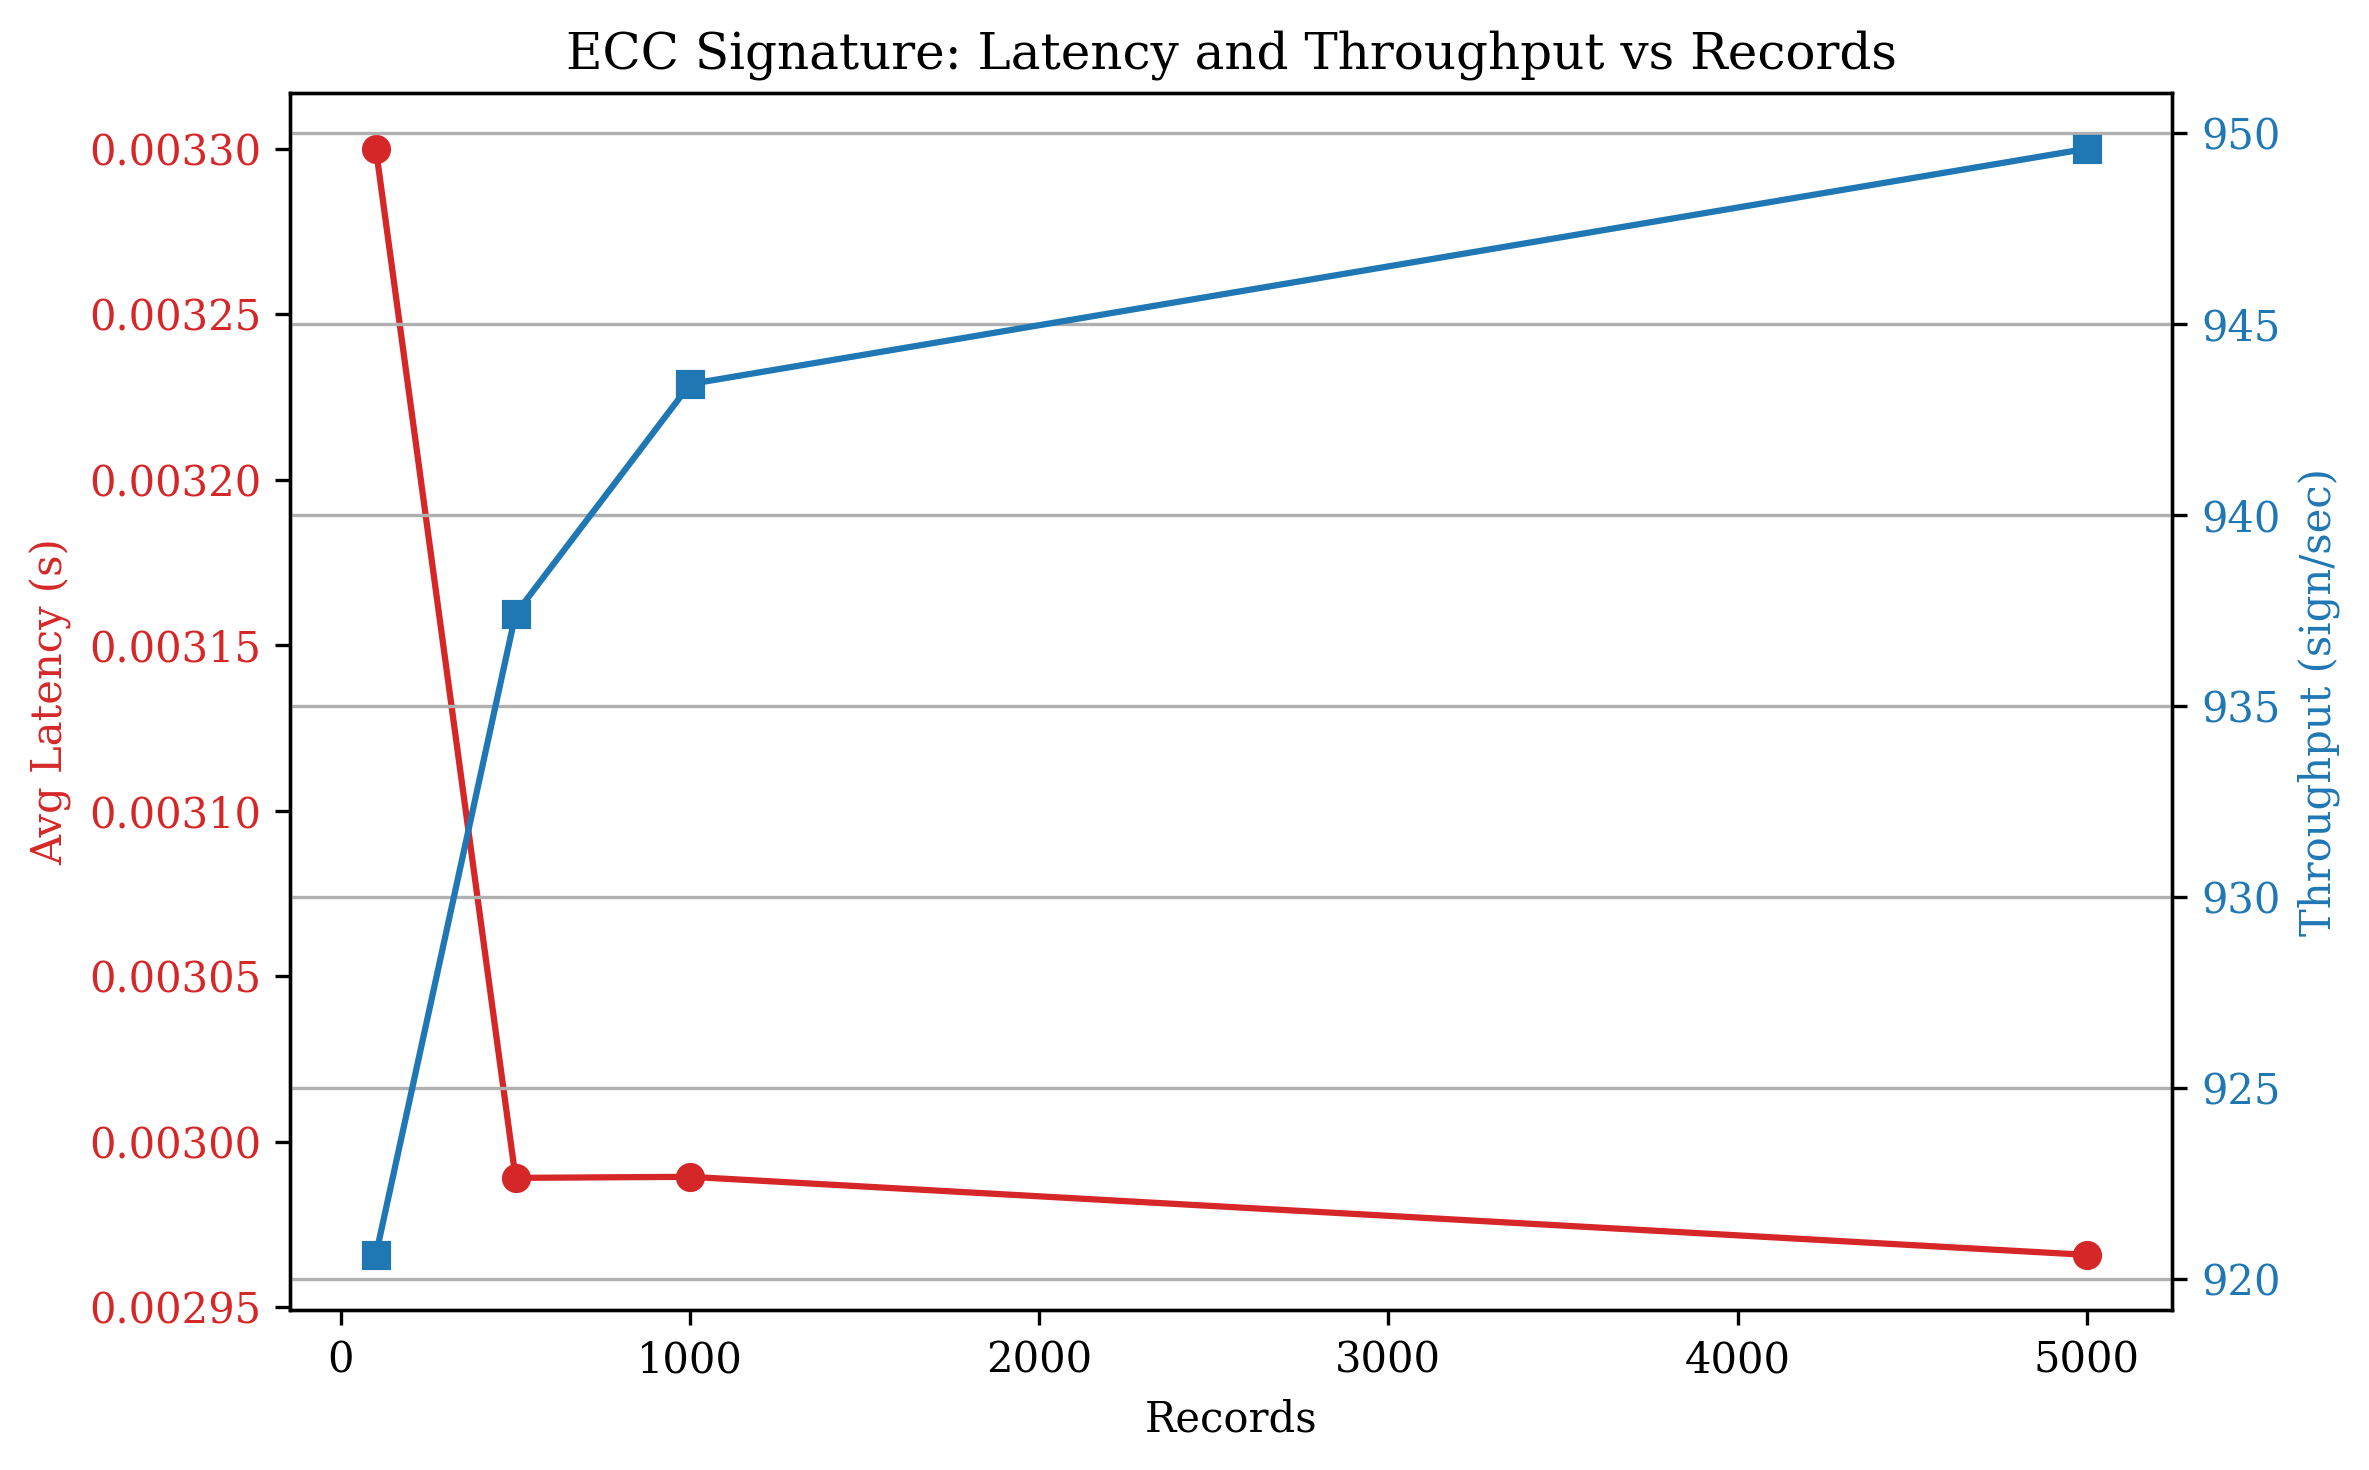

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ECC metrics CSV
df_ecc = pd.read_csv("veremi_ecc_metrics.csv")  # Adjust path if needed

# Configure font and DPI
plt.rcParams["font.family"] = "Serif"
plt.rcParams["figure.dpi"] = 300

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Latency
ax1.set_xlabel('Records')
ax1.set_ylabel('Avg Latency (s)', color='tab:red')
ax1.plot(df_ecc['Records'], df_ecc['Avg_Latency'], marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Plot Throughput
ax2 = ax1.twinx()
ax2.set_ylabel('Throughput (sign/sec)', color='tab:blue')
ax2.plot(df_ecc['Records'], df_ecc['Throughput (sign/sec)'], marker='s', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Final formatting
plt.title('ECC Signature: Latency and Throughput vs Records', fontsize=12)
plt.grid(True)
fig.tight_layout()
fig.savefig("ecc_performance_300dpi.png", dpi=300)
plt.show()


PQC

In [ ]:
import time
import os
import psutil
import hashlib
import numpy as np
import pandas as pd
from google.colab import files

# STEP 1: Upload dataset
#uploaded = files.upload()

# STEP 2: Load your dataset
df_veremi = pd.read_csv("veremi_balanced_5000.csv")
data_rows = df_veremi.astype(str).agg(','.join, axis=1).tolist()

# STEP 3: Simulated NTRU-like encryption benchmark
def simulate_pqc(data_subset):
    enc_times = []
    dec_times = []
    cpu_usages = []
    mem_usages = []

    for _ in data_subset:
        cpu_before = psutil.cpu_percent(interval=0.1)
        mem_before = psutil.virtual_memory().percent

        # Key generation simulation
        keypair = os.urandom(32)

        # Simulated encryption
        start_enc = time.time()
        ciphertext = hashlib.sha256(keypair).digest()
        enc_times.append(time.time() - start_enc)

        # Simulated decryption
        start_dec = time.time()
        recovered_key = hashlib.sha256(ciphertext).digest()
        dec_times.append(time.time() - start_dec)

        cpu_after = psutil.cpu_percent(interval=0.1)
        mem_after = psutil.virtual_memory().percent
        cpu_usages.append(cpu_after - cpu_before)
        mem_usages.append(mem_after - mem_before)

    return {
        "Records": len(data_subset),
        "Avg_Enc_Time": np.mean(enc_times),
        "Avg_Dec_Time": np.mean(dec_times),
        "Avg_Latency": np.mean(enc_times) + np.mean(dec_times),
        "Avg_CPU_Usage": np.mean(cpu_usages),
        "Avg_Mem_Usage": np.mean(mem_usages),
        "Throughput (encrypt/sec)": len(data_subset) / sum(enc_times)
    }

# STEP 4: Run for different record sizes
results = []
for size in [100, 500, 1000, 5000]:
    subset = data_rows[:size]
    print(size)
    metrics = simulate_pqc(subset)
    results.append(metrics)

# STEP 5: Save and download results
df_pqc = pd.DataFrame(results)
df_pqc.to_csv("veremi_pqc_simulated_metrics.csv", index=False)
files.download("veremi_pqc_simulated_metrics.csv")



100
500
1000
5000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

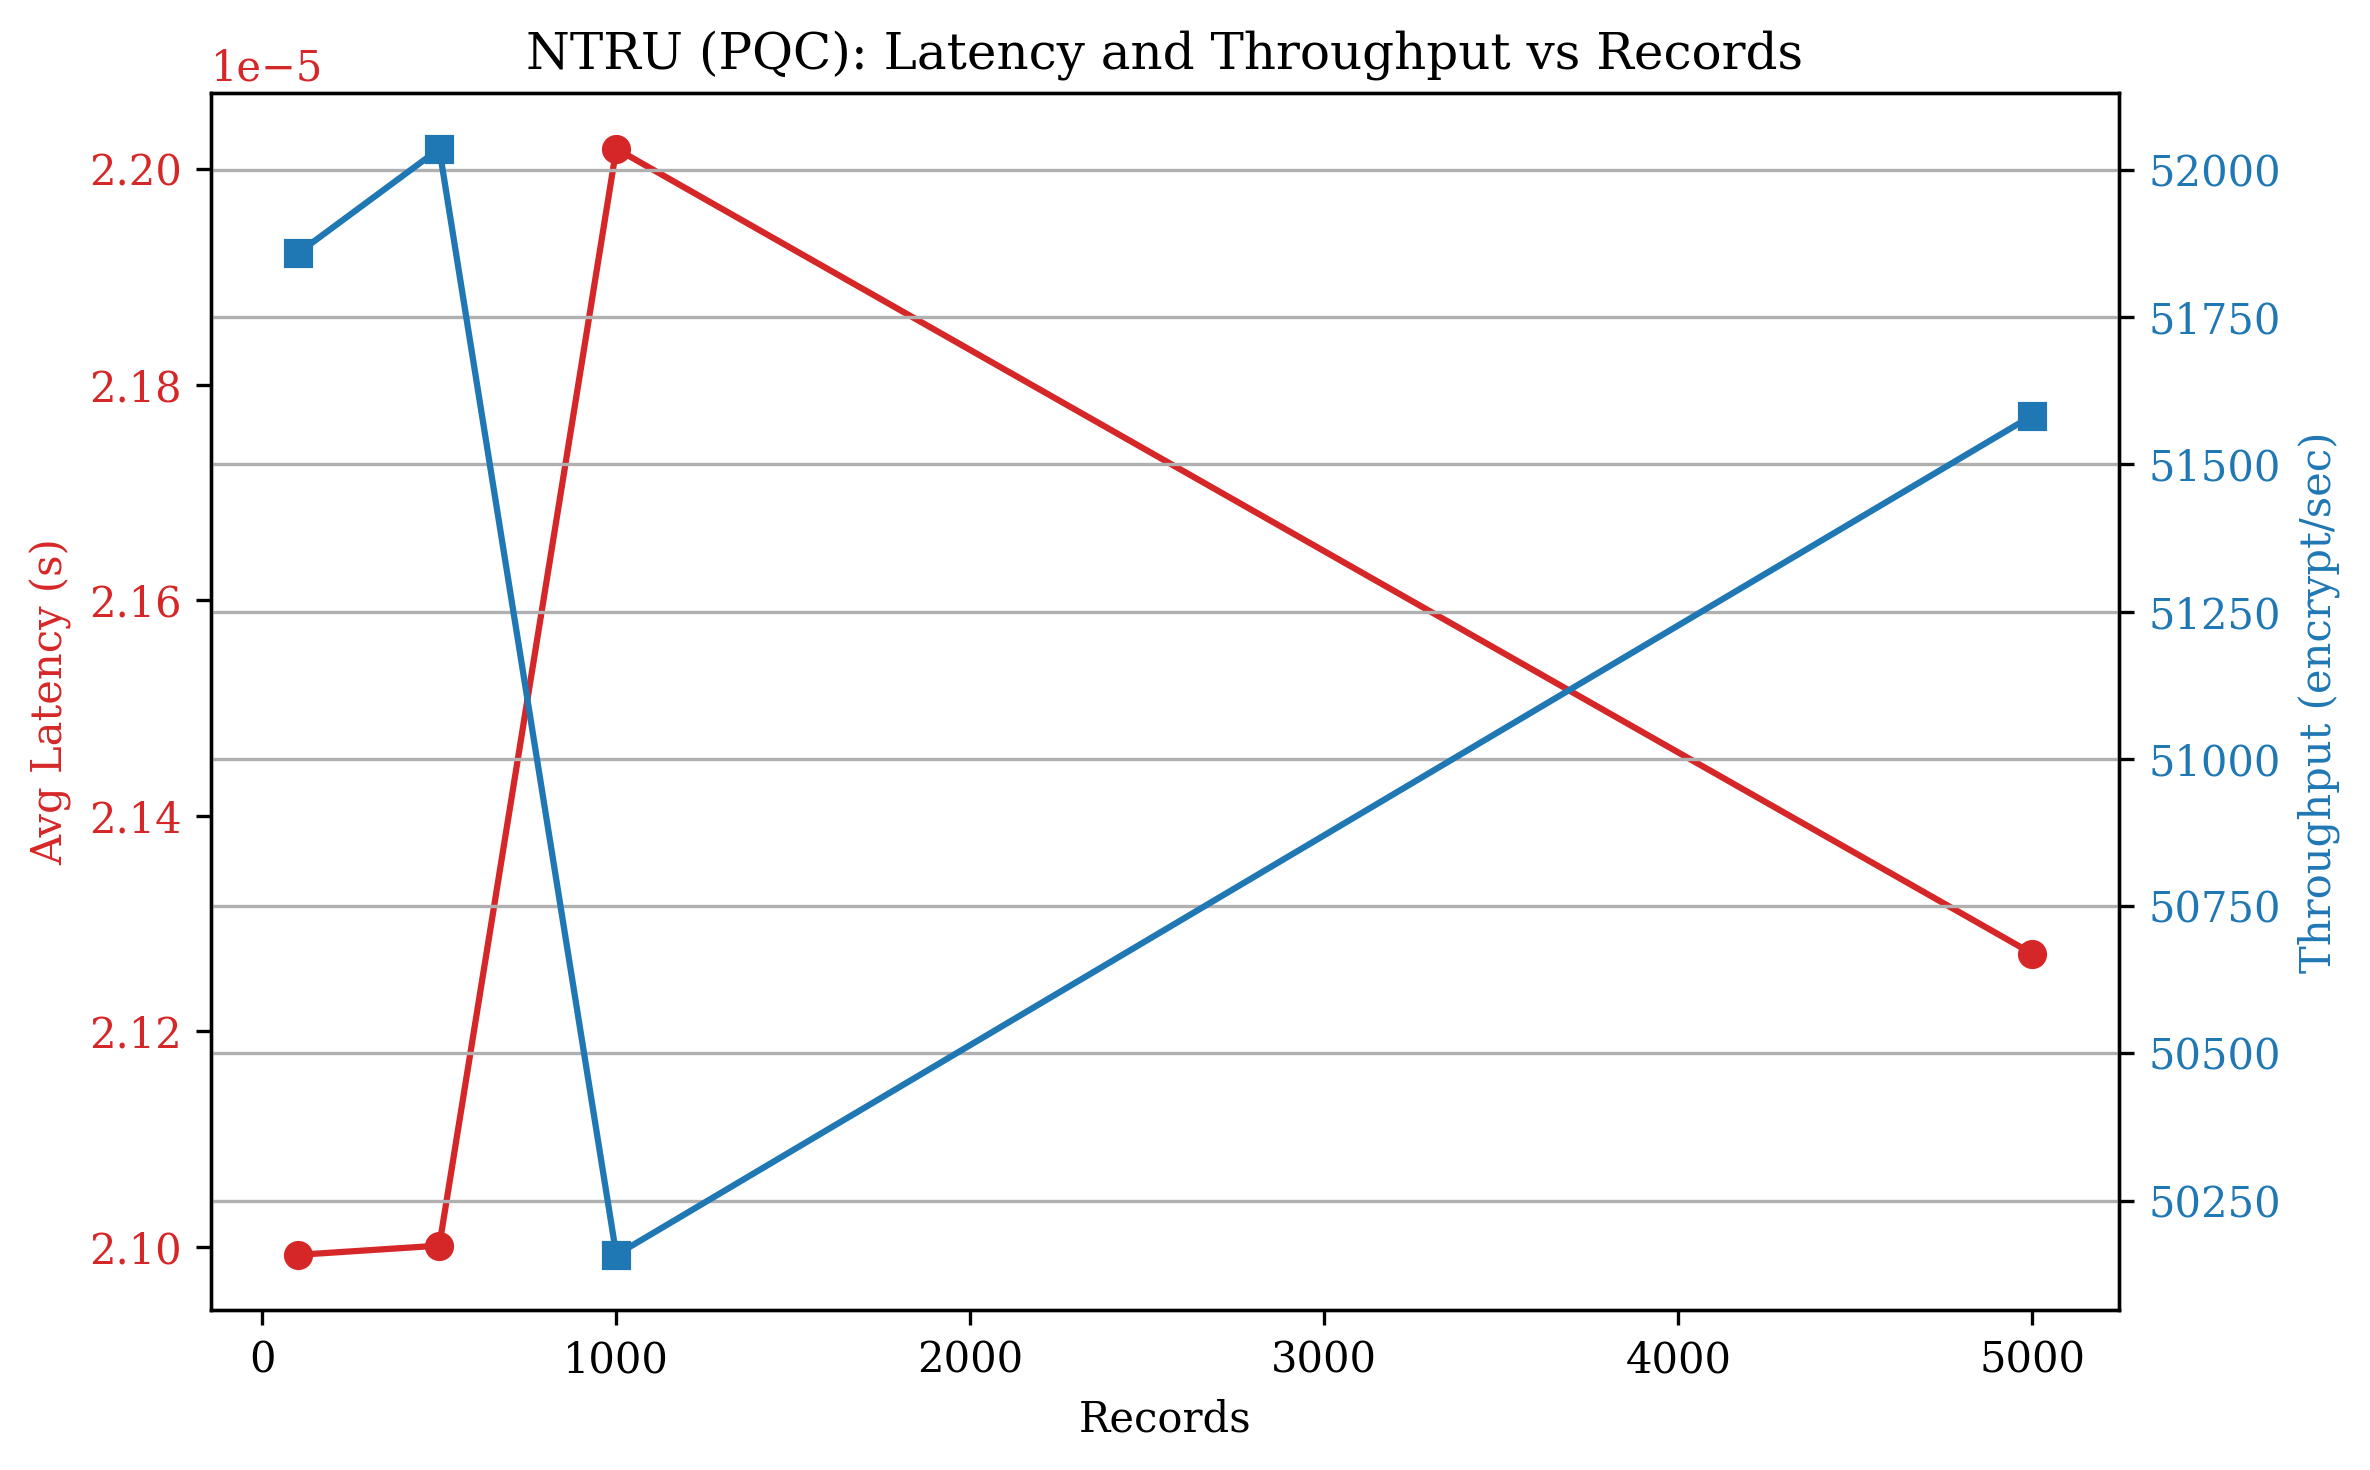

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load NTRU PQC results
df_ntru = pd.read_csv("veremi_pqc_simulated_metrics.csv")  # adjust if needed

# Plot config
plt.rcParams["font.family"] = "Serif"
plt.rcParams["figure.dpi"] = 300

# Create plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Latency (left axis)
ax1.set_xlabel('Records')
ax1.set_ylabel('Avg Latency (s)', color='tab:red')
ax1.plot(df_ntru['Records'], df_ntru['Avg_Latency'], marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Plot Throughput (right axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Throughput (encrypt/sec)', color='tab:blue')
ax2.plot(df_ntru['Records'], df_ntru['Throughput (encrypt/sec)'], marker='s', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Final formatting
plt.title('NTRU (PQC): Latency and Throughput vs Records', fontsize=12)
plt.grid(True)
fig.tight_layout()

# Save as high-res PNG
fig.savefig("veremi_pqc_simulated_metrics_300dpi.png", dpi=300)
plt.show()


Normalize

In [ ]:
# STEP 1: Upload all 5 CSVs
from google.colab import files
uploaded = files.upload()

# STEP 2: Load CSVs
import pandas as pd

df_aes = pd.read_csv("aes_evaluation_metrics.csv")
df_rsa = pd.read_csv("rsa_evaluation_metrics.csv")
df_ecc = pd.read_csv("veremi_ecc_metrics.csv")
df_pqc = pd.read_csv("veremi_pqc_simulated_metrics.csv")
df_dh  = pd.read_csv("dh_key_exchange_metrics.csv")

# STEP 3: Rename throughput columns to common format
df_aes.rename(columns={"Throughput": "Throughput_rps"}, inplace=True)
df_rsa.rename(columns={"Throughput": "Throughput_rps"}, inplace=True)
df_ecc.rename(columns={"Throughput (sign/sec)": "Throughput_rps"}, inplace=True)
df_pqc.rename(columns={"Throughput (encrypt/sec)": "Throughput_rps"}, inplace=True)
df_dh.rename(columns={"Throughput (exchanges/sec)": "Throughput_rps"}, inplace=True)

# STEP 4: Create summary DataFrame
summary = pd.DataFrame([
    {
        "Algorithm": "AES",
        "Avg_Latency": df_aes['Avg_Latency'].mean(),
        "Avg_Throughput": df_aes['Throughput_rps'].mean(),
        "Avg_CPU_Usage": df_aes['Avg_CPU_Usage'].mean(),
        "Avg_Mem_Usage": df_aes['Avg_Mem_Usage'].mean(),
    },
    {
        "Algorithm": "RSA",
        "Avg_Latency": df_rsa['Avg_Latency'].mean(),
        "Avg_Throughput": df_rsa['Throughput_rps'].mean(),
        "Avg_CPU_Usage": df_rsa['Avg_CPU_Usage'].mean(),
        "Avg_Mem_Usage": df_rsa['Avg_Mem_Usage'].mean(),
    },
    {
        "Algorithm": "ECC",
        "Avg_Latency": df_ecc['Avg_Latency'].mean(),
        "Avg_Throughput": df_ecc['Throughput_rps'].mean(),
        "Avg_CPU_Usage": df_ecc['Avg_CPU_Usage'].mean(),
        "Avg_Mem_Usage": df_ecc['Avg_Mem_Usage'].mean(),
    },
    {
        "Algorithm": "PQC-NTRU",
        "Avg_Latency": df_pqc['Avg_Latency'].mean(),
        "Avg_Throughput": df_pqc['Throughput_rps'].mean(),
        "Avg_CPU_Usage": df_pqc['Avg_CPU_Usage'].mean(),
        "Avg_Mem_Usage": df_pqc['Avg_Mem_Usage'].mean(),
    },
    {
        "Algorithm": "DH",
        "Avg_Latency": df_dh['Avg_Latency'].mean(),
        "Avg_Throughput": df_dh['Throughput_rps'].mean(),
        "Avg_CPU_Usage": df_dh['Avg_CPU_Usage'].mean(),
        "Avg_Mem_Usage": df_dh['Avg_Mem_Usage'].mean(),
    },
])

# STEP 5: Normalize scores
normalized = summary.copy()
normalized['Latency_Score'] = 1 - ((summary['Avg_Latency'] - summary['Avg_Latency'].min()) /
                                   (summary['Avg_Latency'].max() - summary['Avg_Latency'].min()))
normalized['Throughput_Score'] = ((summary['Avg_Throughput'] - summary['Avg_Throughput'].min()) /
                                  (summary['Avg_Throughput'].max() - summary['Avg_Throughput'].min()))
normalized['CPU_Score'] = 1 - ((summary['Avg_CPU_Usage'] - summary['Avg_CPU_Usage'].min()) /
                               (summary['Avg_CPU_Usage'].max() - summary['Avg_CPU_Usage'].min()))
normalized['Mem_Score'] = 1 - ((summary['Avg_Mem_Usage'] - summary['Avg_Mem_Usage'].min()) /
                               (summary['Avg_Mem_Usage'].max() - summary['Avg_Mem_Usage'].min()))

# STEP 6: Display and export table
print(normalized)

normalized.to_csv("normalized_algorithm_comparison.csv", index=False)
files.download("normalized_algorithm_comparison.csv")


Saving veremi_pqc_simulated_metrics.csv to veremi_pqc_simulated_metrics (1).csv
Saving dh_key_exchange_metrics.csv to dh_key_exchange_metrics.csv
Saving veremi_ecc_metrics.csv to veremi_ecc_metrics.csv
Saving rsa_evaluation_metrics.csv to rsa_evaluation_metrics.csv
Saving aes_evaluation_metrics.csv to aes_evaluation_metrics.csv
  Algorithm  Avg_Latency  Avg_Throughput  Avg_CPU_Usage  Avg_Mem_Usage  \
0       AES     0.000133     9939.050814      -0.068335      -0.000685   
1       RSA     0.002543     1365.859080       0.206610       0.000245   
2       ECC     0.003061      937.755524       0.197275      -0.000040   
3  PQC-NTRU     0.000021    51408.789027       0.114710      -0.000715   
4        DH     0.376145     7658.687890      -0.468100      -0.000405   

   Latency_Score  Throughput_Score  CPU_Score  Mem_Score  
0       0.999703          0.178346   0.407501   0.968750  
1       0.993296          0.008482   0.000000   0.000000  
2       0.991918          0.000000   0.013836   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

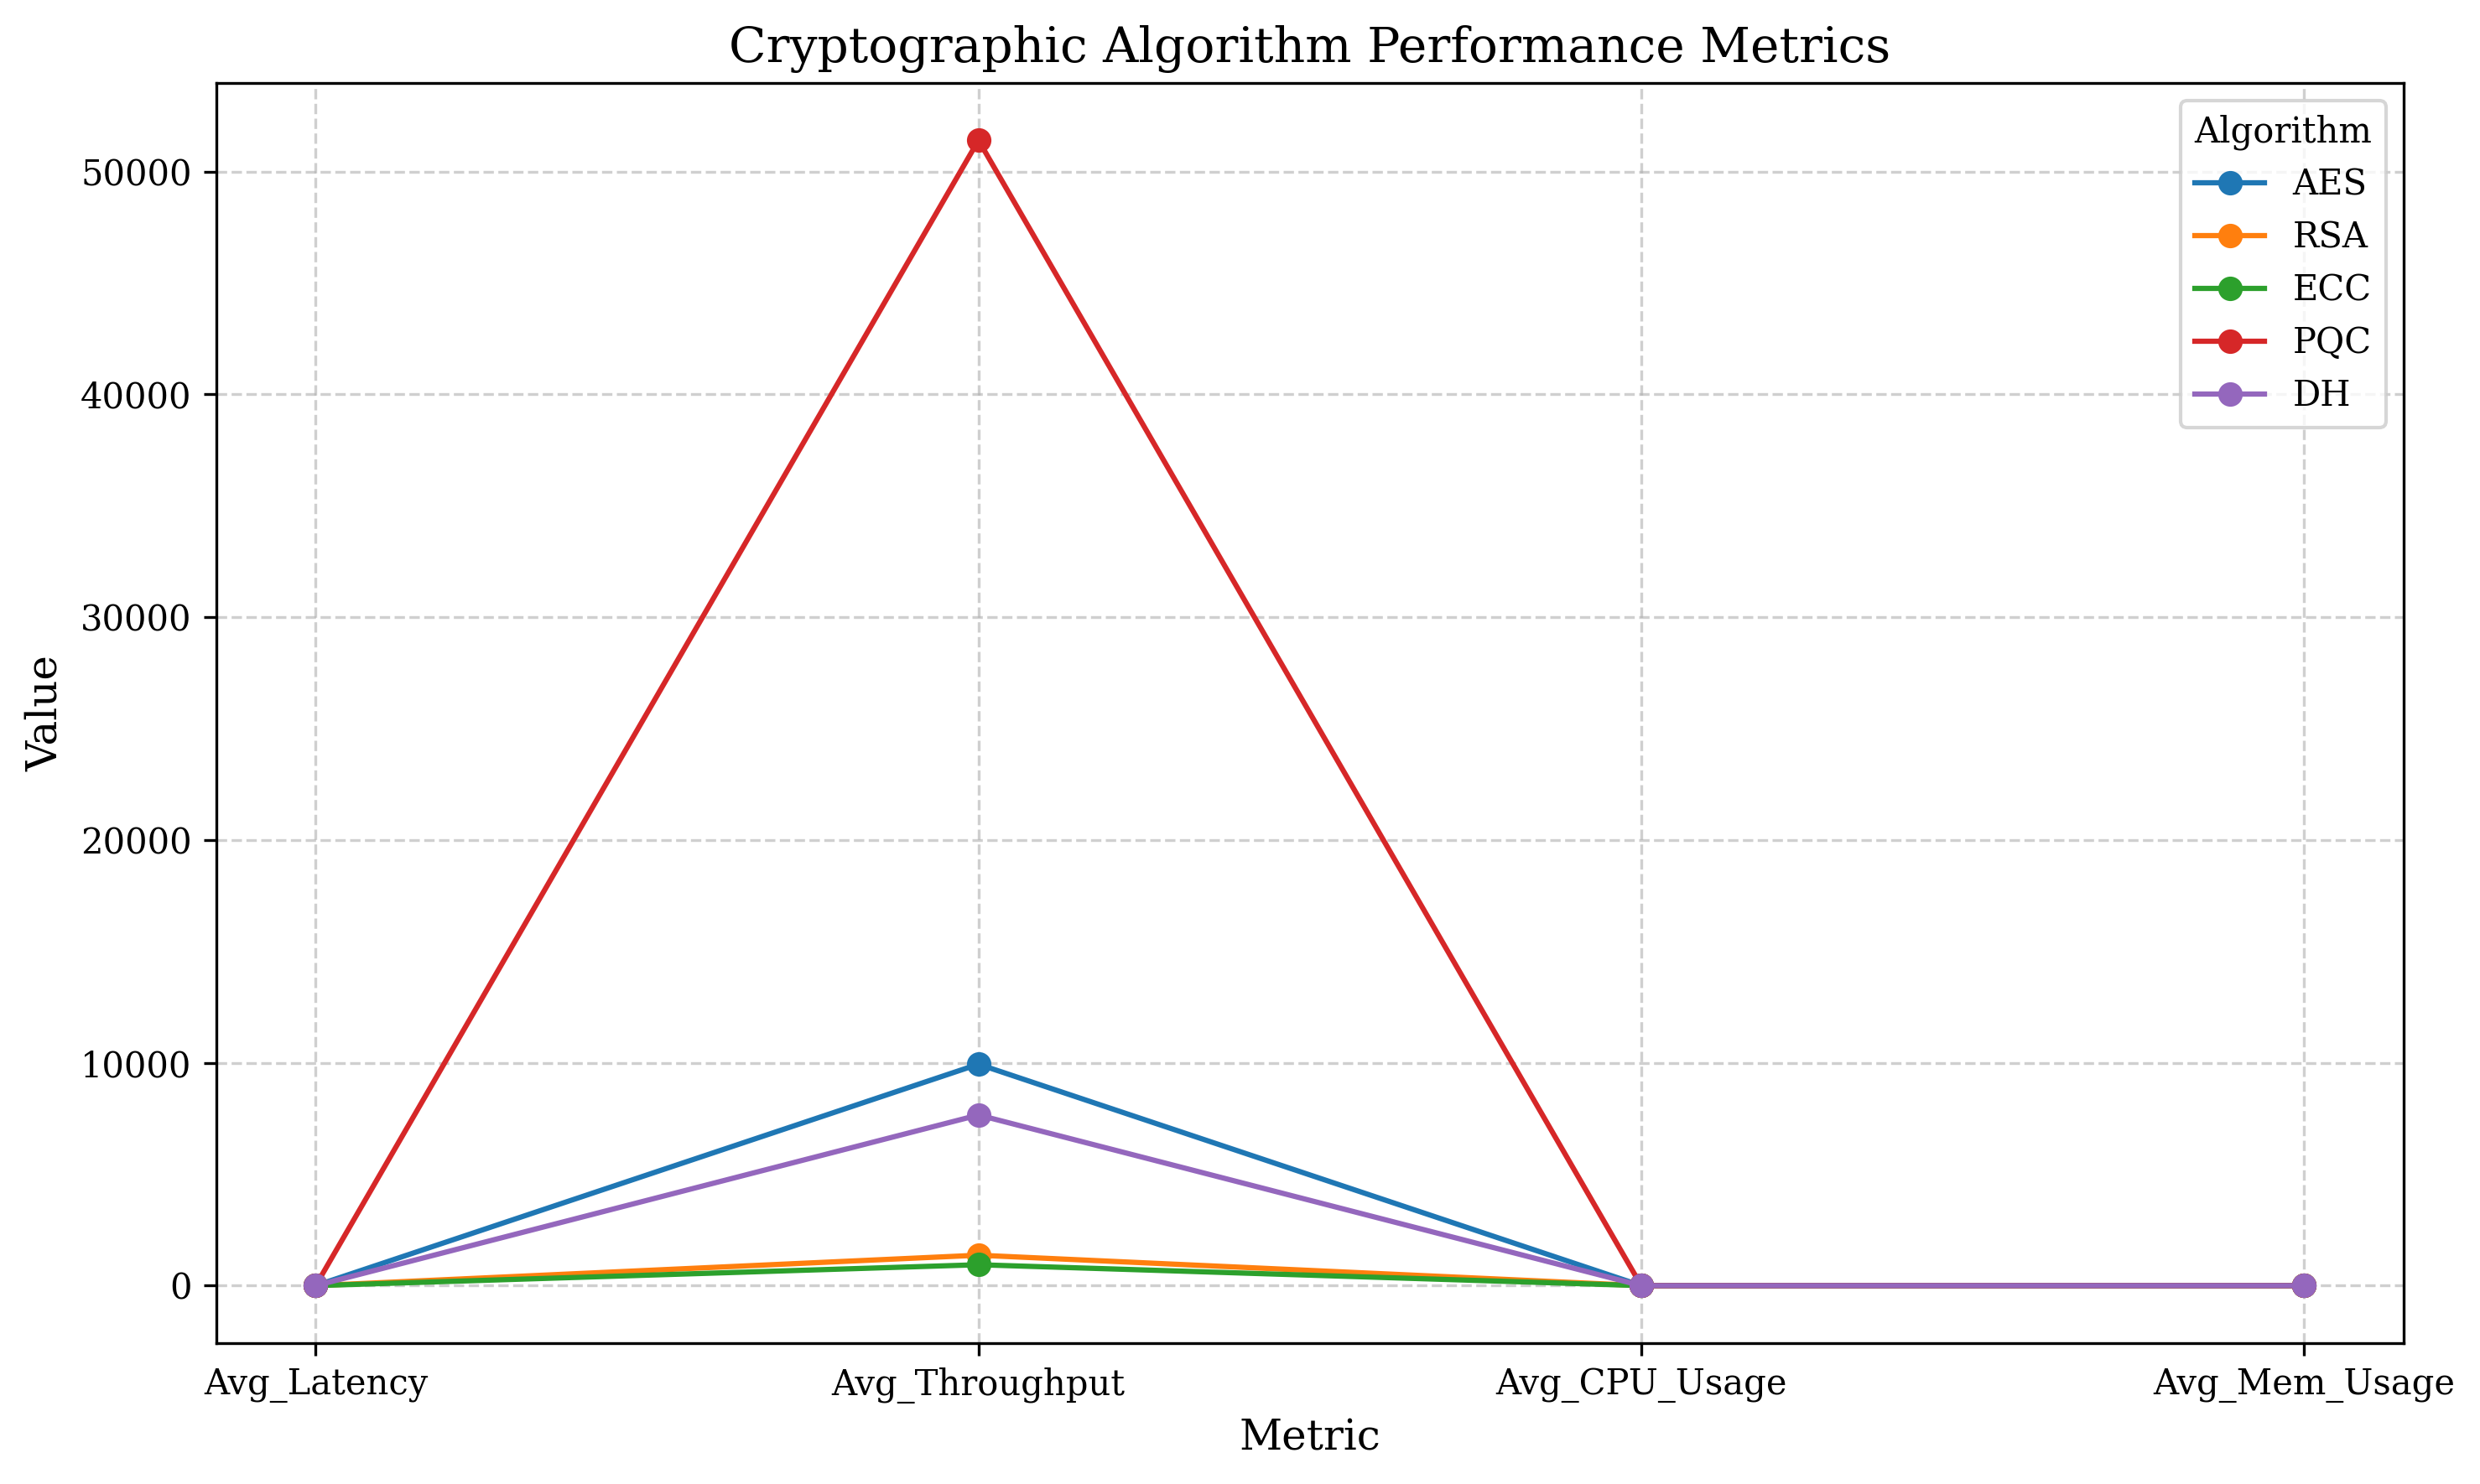

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define metric data
data = {
    "Algorithm": ["AES", "RSA", "ECC", "PQC", "DH"],
    "Avg_Latency": [0.0001, 0.0025, 0.0031, 0.0000, 0.3761],
    "Avg_Throughput": [9939.1, 1365.9, 937.8, 51408.8, 7658.7],
    "Avg_CPU_Usage": [-0.0683, 0.2066, 0.1973, 0.1147, -0.4681],
    "Avg_Mem_Usage": [-0.0007, 0.0002, 0.0000, -0.0007, -0.0004]
}

# Step 2: Create DataFrame and set index
df = pd.DataFrame(data)
df.set_index("Algorithm", inplace=True)

# Step 3: Configure plot settings
plt.rcParams["font.family"] = "Serif"
plt.rcParams["figure.dpi"] = 300

# Step 4: Transpose the DataFrame for plotting
df_t = df.transpose()

# Step 5: Plot line chart
plt.figure(figsize=(10, 6))
for algorithm in df_t.columns:
    plt.plot(df_t.index, df_t[algorithm], marker='o', label=algorithm)

# Step 6: Chart formatting
plt.title("Cryptographic Algorithm Performance Metrics", fontsize=14)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Algorithm", fontsize=10)
plt.tight_layout()

# Step 7: Save high-resolution PNG
plt.savefig("algorithm_performance_line_chart_300dpi.png", dpi=300)
plt.show()


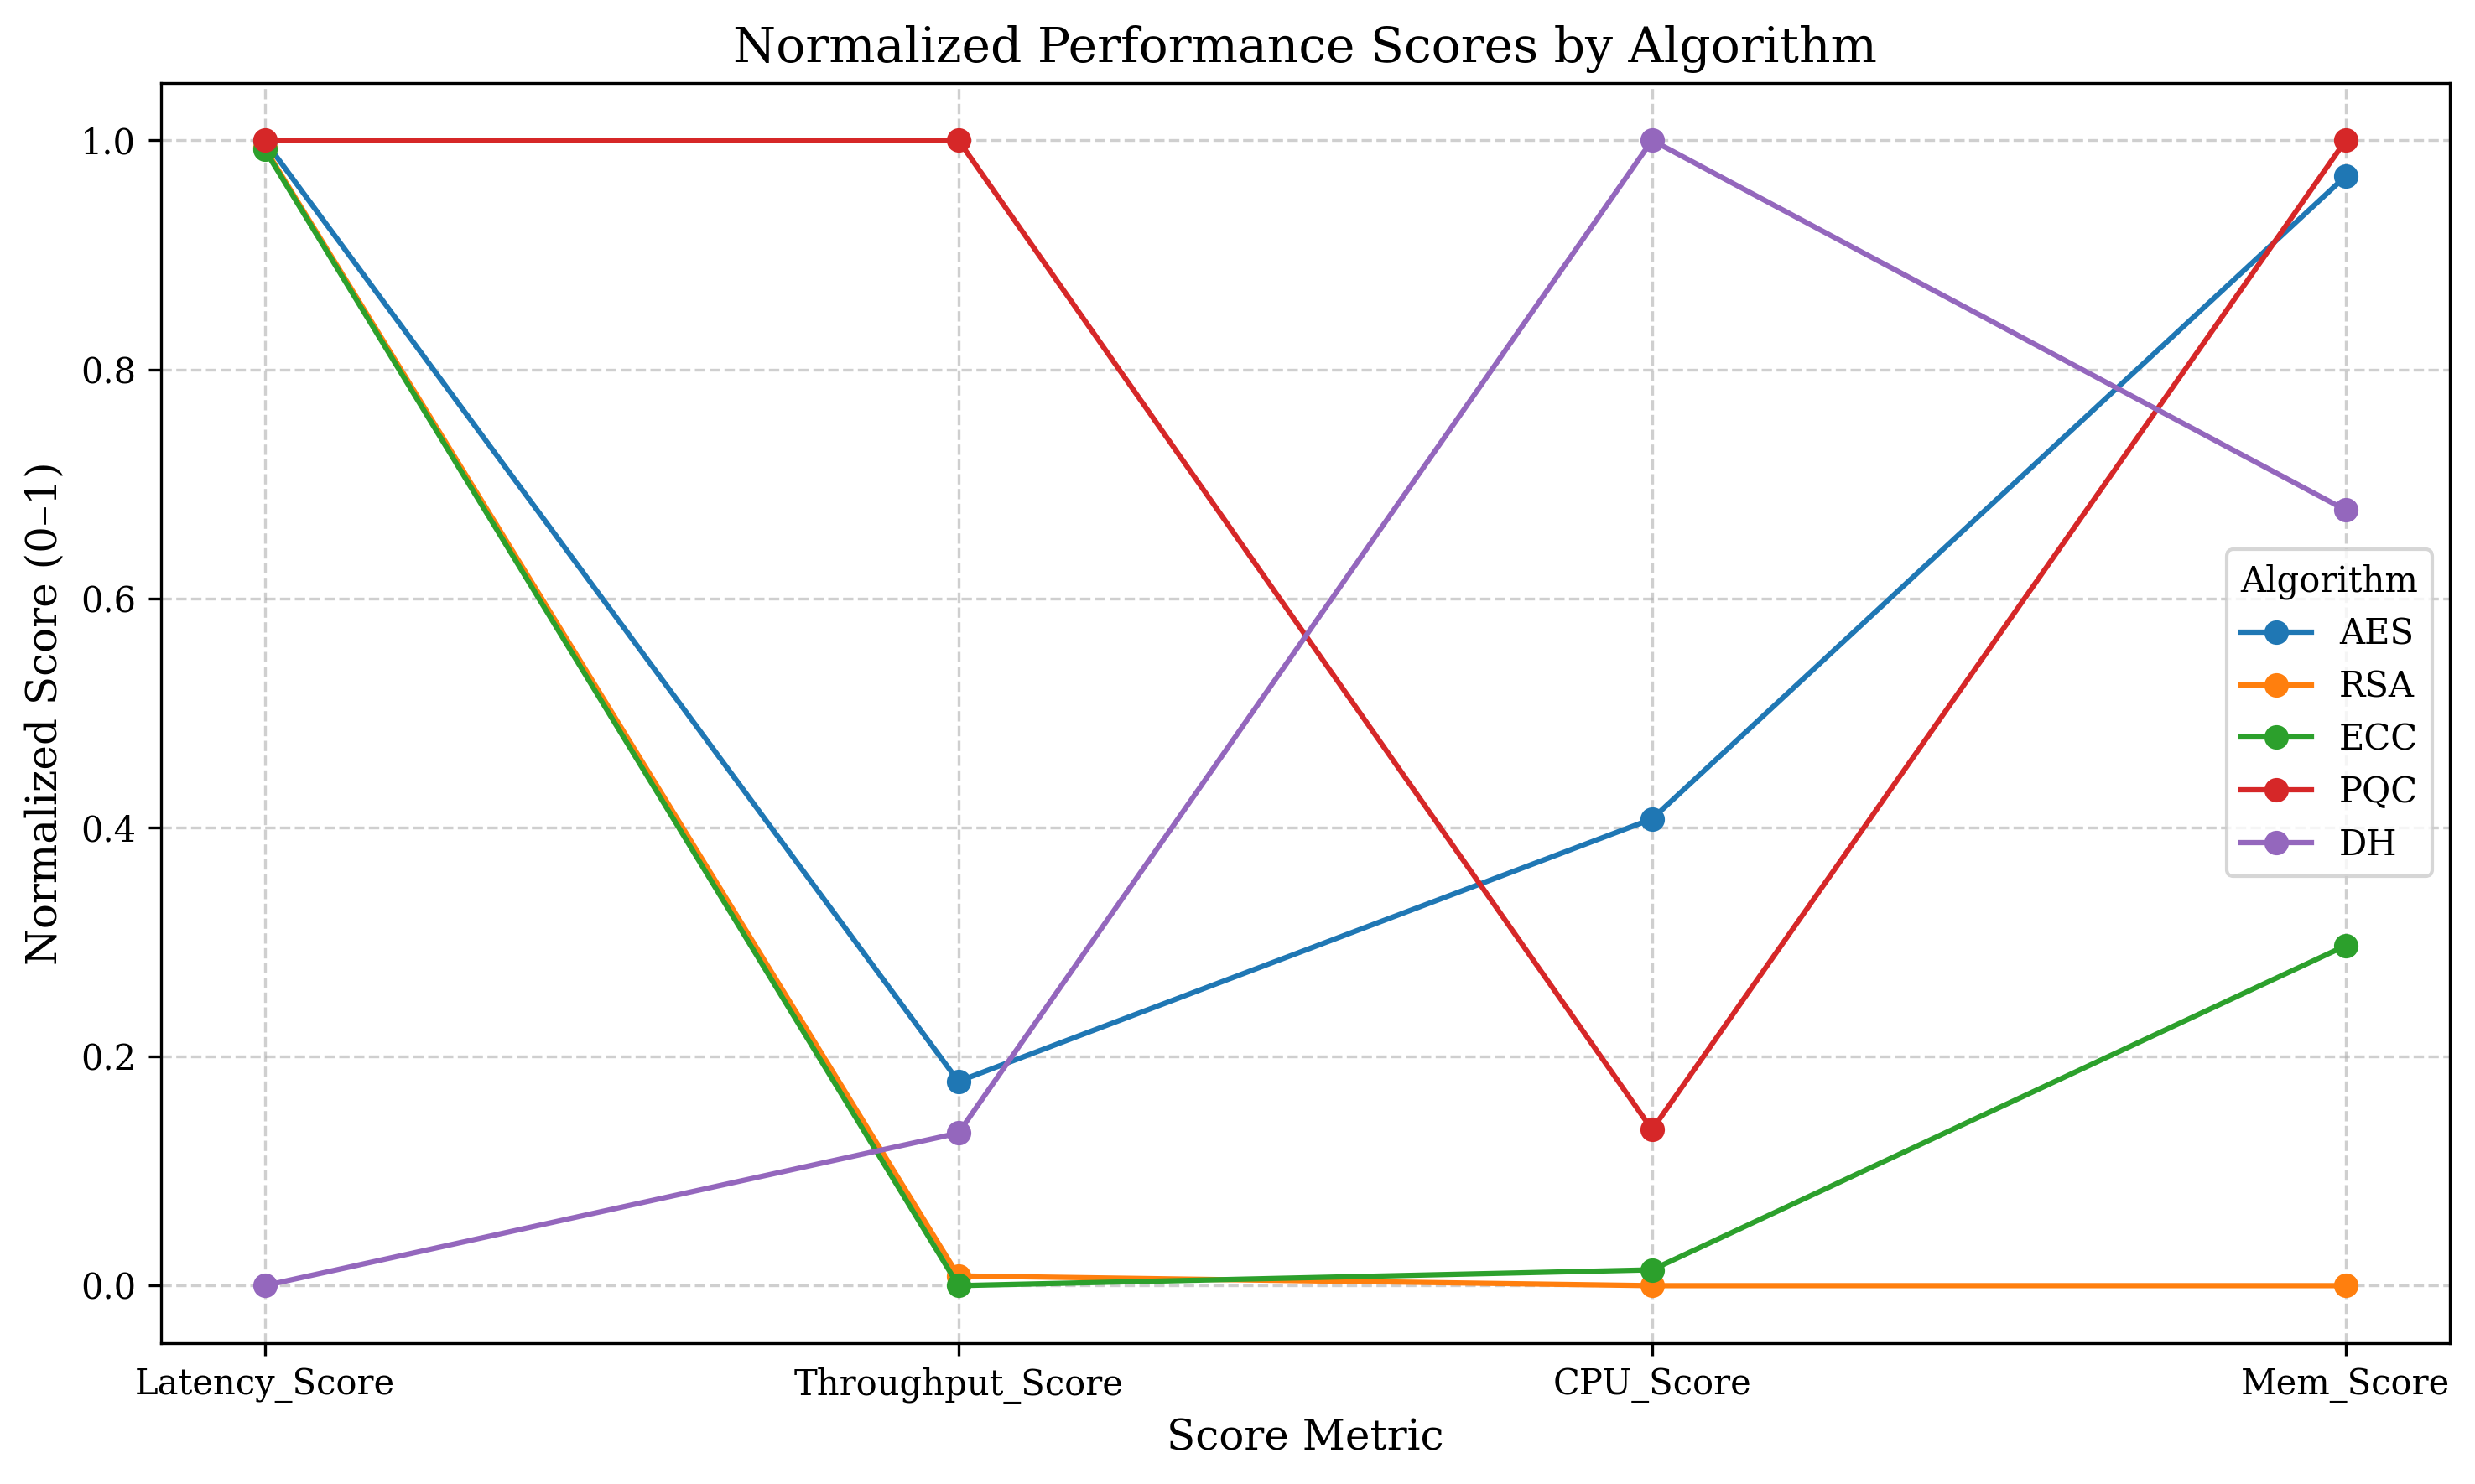

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define normalized scores
data = {
    "Algorithm": ["AES", "RSA", "ECC", "PQC", "DH"],
    "Latency_Score": [0.9997, 0.9933, 0.9919, 1, 0],
    "Throughput_Score": [0.1783, 0.0085, 0, 1, 0.1332],
    "CPU_Score": [0.4075, 0, 0.0138, 0.1362, 1],
    "Mem_Score": [0.9688, 0, 0.2969, 1, 0.6771]
}

# Step 2: Create DataFrame
df_scores = pd.DataFrame(data)
df_scores.set_index("Algorithm", inplace=True)

# Step 3: Plot settings
plt.rcParams["font.family"] = "Serif"
plt.rcParams["figure.dpi"] = 300

# Step 4: Transpose for line plotting
df_scores_t = df_scores.transpose()

# Step 5: Create line chart
plt.figure(figsize=(10, 6))
for algorithm in df_scores_t.columns:
    plt.plot(df_scores_t.index, df_scores_t[algorithm], marker='o', label=algorithm)

# Step 6: Formatting
plt.title("Normalized Performance Scores by Algorithm", fontsize=14)
plt.xlabel("Score Metric", fontsize=12)
plt.ylabel("Normalized Score (0–1)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Algorithm", fontsize=10)
plt.tight_layout()

# Step 7: Save high-resolution figure
plt.savefig("normalized_scores_line_chart_300dpi.png", dpi=300)
plt.show()


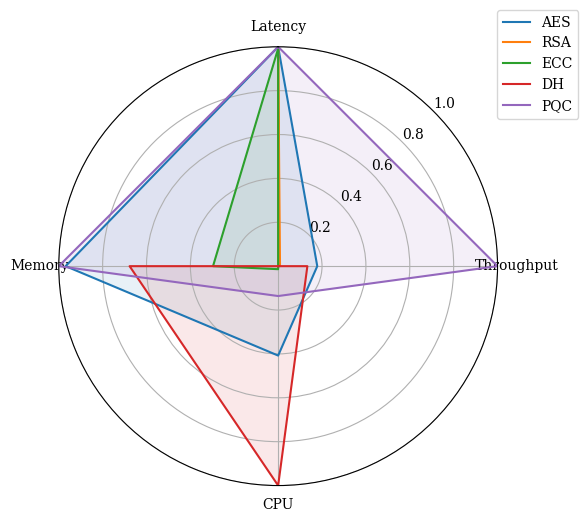

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Set global font to serif
matplotlib.rcParams['font.family'] = 'serif'

# Data
algorithms = ['AES', 'RSA', 'ECC',  'DH', 'PQC']
metrics = ['Latency', 'Throughput', 'CPU', 'Memory']
scores = [
    [0.9997, 0.1783, 0.4075, 0.9688],  # AES
    [0.9933, 0.0085, 0.0,     0.0   ],  # RSA
    [0.9919, 0.0,    0.0138,  0.2969],  # ECC
    [0.0,    0.1332, 1.0,     0.6771],   # DH
      [1.0,    1.0,    0.1362,  1.0   ]  # PQC
]

# Radar chart setup
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each algorithm
for i, score in enumerate(scores):
    data = score + score[:1]  # close the loop
    ax.plot(angles, data, label=algorithms[i], linewidth=1.5)
    ax.fill(angles, data, alpha=0.1)

# Format axes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_metrics)
#ax.set_title('Normalized Performance Comparison Across Encryption Algorithms', pad=20)

# Legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Save the figure at 300 DPI
plt.tight_layout()
plt.savefig("encryption_algorithm_radar_chart.png", dpi=300)
plt.show()
